# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 23 (Tuesday) 11:00 pm </font>  

<font color="blue">Sumedh Joglekar </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

## 1.  Introduction of data for classification & source

- The dataset contains the historical data on avocado prices and sales volume in multiple US markets from 2015 to 2018.
- The Average Price of avocados in the table reflects a per unit cost, even when multiple avocados units are sold in bags.
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados

### Data Observation:

__Below is the description of the various variables present in the data :__

1. Date - The date of the incident
2. AveragePrice - the average price of a avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the incident
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold :- Small Hass
8. 4225 - Total number of avocados with PLU 4225 sold :- Large Hass
9. 4770 - Total number of avocados with PLU 4770 sold :- Extra Large Hass

### Source :

https://www.kaggle.com/neuromusic/avocado-prices

## 1. Reading the data

Here I am reading the data from CSV file with the use of pandas read_csv function.

P.S. :- Place the file path in read_csv function while running the code so that csv file will get read.

In [41]:
### Importing the required libraries ####
import seaborn as sns
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from copy import deepcopy as copy 
#########
#########
print("Reading the file :- ")
#print(os.listdir("D:\sum\Its Study Time\Academic\M.S\Spring_2019\Machine Learning\Assignment 3"))
###################
data = pd.read_csv("https://raw.githubusercontent.com/sjogleka/Deep_Learning/master/avocado.csv", encoding='utf-8')# Place the file location here.
data.head(10)

Reading the file :- 


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


## 2. Preprocessing of the data

In order to do the pre-processing task, I have followed below steps:-
1. Check for the null values, if any null data is present either remove the entries(if entries are less in number) or replace the null value with the mean of that category. If any of this method is not suitable then think for other pre-processing tasks.
2. Eliminate irrelevant columns so that the visualization will be easier.
3. Rename the column names of PLU's with the bag size so that data interpretation can be more convenient.
4. Separated out the 'date' column into 'year' as it will be easy to visualize the data distribution over different years.
5. Initial observation, it was found that there is an overlapping of the data in the given dataset and hence removed the overlapping entries from the dataset.

In [42]:
# Pre Processing the data.. Splitting the column Date and taking out only year from it ########
################# 1. Checking for thr null Values ################
print(data.isnull().sum())
################# 2. Dropping unwanted column Unnamed ################
data.rename( columns={'Unnamed: 0':'new column name'}, inplace=True )
data = data.drop('new column name', axis=1)
################# 3. Renaming the columns so that visualization will be more convinient ################
data = data.rename(index=str, columns={"4046" : "Small_Hass", "4225" : "Large_Hass", "4770" : "XLarge_Hass"})
data.head()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


,Date,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [43]:
########### 4.Separating out Year from  Date column ########### 
data
new_data = data["Date"].str.split("-", n = 2, expand = True) 
data["Year"] = new_data[0]
data.drop(columns=["Date"], inplace = True)
data.head()
#new_data

,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015


### Note :-
After observing the data, it is found that there is overlapping between data, e.g there is a data of California as well as SanFrancisco. We need to remove the overlapping data to have correct visualization. Hence removing overlapping data by dropping certain rows.

In [44]:
############ 5. Removing the overlapping data. #############
regionsToDrop = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 
                   'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
data = data[~data.region.isin(regionsToDrop)] # Taking compliment of data not present in regionsToDrop
data.head()

,AveragePrice,Total Volume,Small_Hass,Large_Hass,XLarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015


## 3. Visualization of the data


Taking 5 cities and checking the pattern in which the prices are increased. To do that plotting the line graph for all years with average price.

Top 5 Contries:- 
----------------
HartfordSpringfield
SanFrancisco
Philadelphia
Sacramento
Charlotte


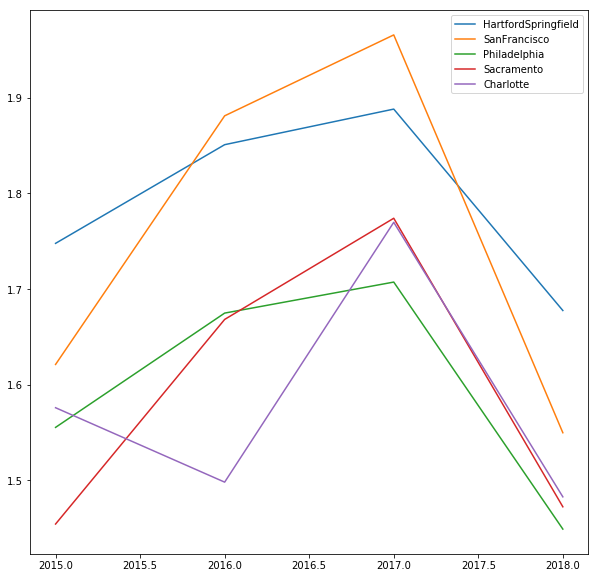

In [45]:
############ Average Price of Avocado According to the Year for top 5 highest average prices ##########
area_list=list(data.region.unique())
unique_years = list(data.year.unique())
area_averageprice_ratio=[]
for i in area_list:
    x=data[data['region']==i]
    area_averageprice_rate=sum(x['AveragePrice'])/len(x)
    area_averageprice_ratio.append(area_averageprice_rate)
#area_averageprice_ratio = sorted(area_averageprice_ratio,reverse=True)
#print(area_averageprice_ratio)
df=pd.DataFrame({'area_list':area_list,'area_averageprice_ratio':area_averageprice_ratio})
new_index=df['area_averageprice_ratio'].sort_values(ascending=False).index.values
sorted_data=df.reindex(new_index)
#print(sorted_data.area_list[int(sorted_data.index[0])])
plt.figure(figsize=(10,10))
test1=[]
print("Top 5 Contries:- ")
print("----------------")
for i in range(0,5):
    avg_column_cali= data[data["region"]==sorted_data.area_list[int(sorted_data.index[i])]]
    print(sorted_data.area_list[int(sorted_data.index[i])])
    #avg_column_cali = data[data["region"]==area_list[i]]                              
    #print(avg_column_cali)
    avg_per_year_cali = avg_column_cali.groupby('year').aggregate('mean')
    #data.year
    #print(avg_per_year_cali.AveragePrice)
    test1.append(sorted_data.area_list[sorted_data.index[i]])
    plt.plot(unique_years,avg_per_year_cali.AveragePrice)
    plt.legend(sorted_data.area_list[int(sorted_data.index[i])])
plt.legend(test1)
plt.show()

### Observation:-

1. Above Graph shows average prices during each year. 
(Here I have taken the graph of 5 cities whose average price cost of avocado was maximum)
2. From the above graph, it can be inferred that the avocado prices were increased substantially in the year 2017.
3. This price rise was mainly due to the low supply and high demand. 
(Source:- https://money.cnn.com/2017/09/09/news/economy/avocado-prices-soar/index.html)
4. Again in 2018, the prices of Avocado dropped below.


Text(0.5, 1.0, 'Average Price/States')

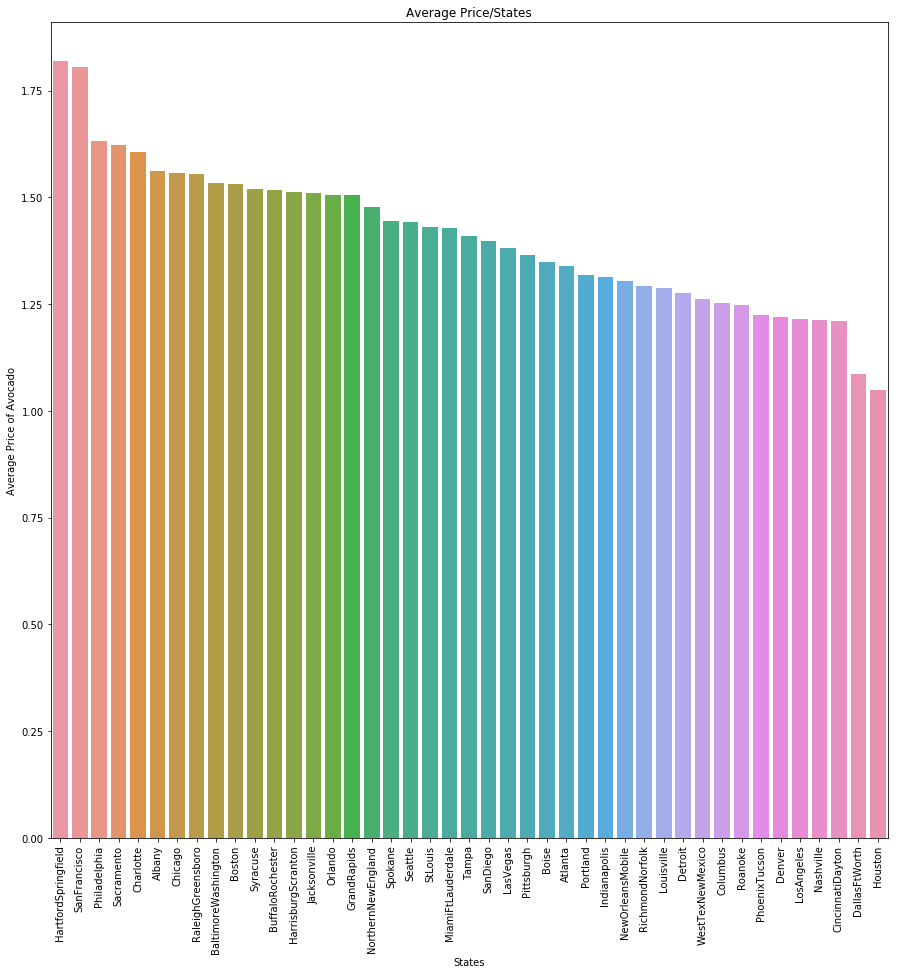

In [46]:
######## Lets Analyze the distribution of Avergae Price over all states #############
plt.figure(figsize=(15,15))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_averageprice_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Average Price of Avocado')
plt.title('Average Price/States')

- Above graph show the distribution of average prices of all states.
- Hartford-Springfield, SanFrancisco, Philadelphia, Sacramento, Charlotte are the top five cities in which average price was higher(considering all 4 years) and the average price of Avocado was minimum in Houston.

Now let's check which type of avocado was more expensive and might be the cause for an increase in average price. The below-plotted bar graph will give more information on the same.

Years :-  [2015, 2016, 2017, 2018]
Conventional Avocados Average Price :-  [1.0821109123434725, 1.1050715563506255, 1.2963624396665214, 1.1306007751937983]
Organic Avocados Average Price :-  [1.6708411633109654, 1.5707558139534832, 1.7429995608256486, 1.568488372093023]


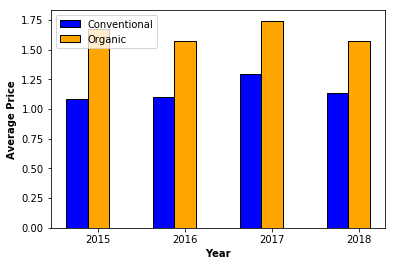

In [47]:
################### Plotting bar graph to find categorial distribution of average price ###################

######### Storing data of each year in different lists ##########
data_15=data[data.year==2015]
data_16=data[data.year==2016]
data_17=data[data.year==2017]
data_18=data[data.year==2018]
years = list(data.year.unique())
print("Years :- ",years)
data_15_con = data_15[data_15.type =='conventional'].AveragePrice.mean()
conventional_data = [float(data_15[data_15.type =='conventional'].AveragePrice.mean()),float(data_16[data_16.type =='conventional'].AveragePrice.mean()),float(data_17[data_17.type =='conventional'].AveragePrice.mean()),float(data_18[data_18.type =='conventional'].AveragePrice.mean())]
print("Conventional Avocados Average Price :- ",conventional_data)
organic_data = [float(data_15[data_15.type =='organic'].AveragePrice.mean()),float(data_16[data_16.type =='organic'].AveragePrice.mean()),float(data_17[data_17.type =='organic'].AveragePrice.mean()),float(data_18[data_18.type =='organic'].AveragePrice.mean())]
print("Organic Avocados Average Price :- ",organic_data)
###########################################
barWidth = 0.25
r1 = np.arange(len(conventional_data))
r2 = [x + barWidth for x in r1]
plt.bar(r1, conventional_data, color='blue', width=barWidth, edgecolor='black', label='Conventional')
plt.bar(r2, organic_data, color='orange', width=barWidth, edgecolor='black', label='Organic')
###
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(conventional_data))], years)
plt.ylabel('Average Price', fontweight='bold')
###
plt.legend()
plt.show()

### Observation:-

1. This bar graph shows clearly that there was an increase in the price of avocado in both categories(Conventional and Organic) in 2017 and this was maximum as compared to any other year.

2. Above comparison between the average price of conventional and organic avocado also shows that the average price of organic avocados was always higher than the conventional and price difference between organic and conventional were maximum in 2015.


To check the effect of price rise on the consumption of the avocado, plotting total volume consumed 

Most consumed cities :-
---------------------
LosAngeles
DallasFtWorth
Houston
PhoenixTucson
WestTexNewMexico


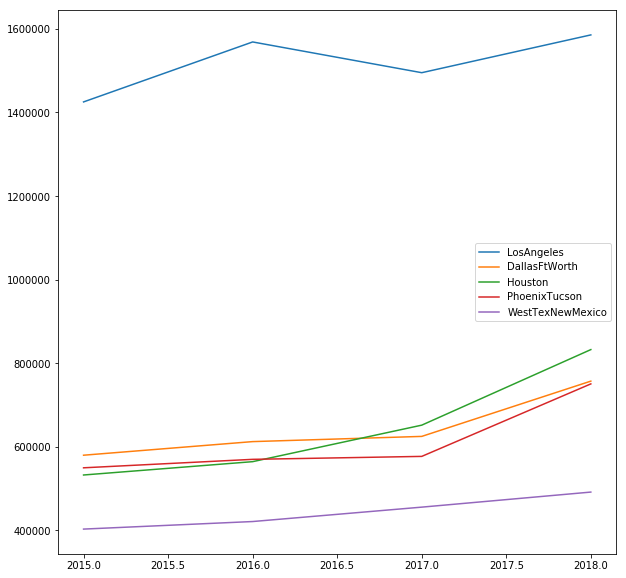

In [48]:
####### Distribution of total consumption of avocado in 5 states #############
data = data.rename(index=str, columns={"Total Volume" : "TotalVolume"})
area_list=list(data.region.unique())
unique_years = list(data.year.unique())
area_averageprice_ratio=[]
for i in area_list:
    x=data[data['region']==i]
    area_averageprice_rate=sum(x['TotalVolume'])/len(x)
    area_averageprice_ratio.append(area_averageprice_rate)
#area_averageprice_ratio = sorted(area_averageprice_ratio,reverse=True)
#print(area_averageprice_ratio)
df=pd.DataFrame({'area_list':area_list,'area_average_volume_ratio':area_averageprice_ratio})
new_index=df['area_average_volume_ratio'].sort_values(ascending=False).index.values
sorted_data=df.reindex(new_index)
plt.figure(figsize=(10,10))
test = []
print("Most consumed cities :-")
print("---------------------")
#print(sorted_data.area_list[int(sorted_data.index[0])])
for i in range(0,5):
    avg_column_cali= data[data["region"]==sorted_data.area_list[int(sorted_data.index[i])]]
    print(sorted_data.area_list[int(sorted_data.index[i])])
    #avg_column_cali = data[data["region"]==area_list[i]]                              
    #print(avg_column_cali)
    avg_per_year_cali = avg_column_cali.groupby('year').aggregate('mean')
    #data.year
    #print(avg_per_year_cali.AveragePrice)
    #print(avg_per_year_cali.TotalVolume)
    test.append(sorted_data.area_list[sorted_data.index[i]])
    plt.plot(unique_years,avg_per_year_cali.TotalVolume)
#print(test)
plt.legend(test)
plt.show()

### Observation :-

From the above graph, it can be concluded that the total volume consumed were maximum in Los Angeles. Although we got the top city in which the consumption of avocado was maximum, plotting the distribution graph of volume consumed in each state to have more understanding about the distribution in each state.

Text(0.5, 1.0, 'Average Volume Consume States')

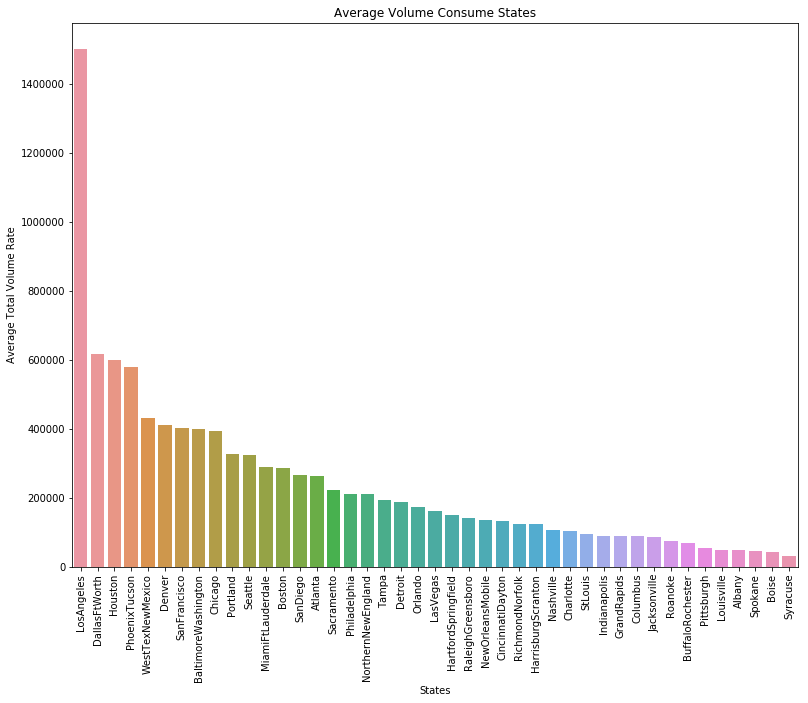

In [49]:
######## Lets Analyze the distribution of Avergae volume consumed over all states #############
plt.figure(figsize=(13,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_average_volume_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('Average Total Volume Rate')
plt.title('Average Volume Consume States')

### Observation :-

- Above Graph shows the distribution of the total volume over all states. From the above graph it can be concluded that the total volume consumed was very large in Los Angeles than any other states.
- Now let's analyze the overall volume distribution of Los Angeles in terms of 'Conventional' and 'Organic', to see which type of Avocados are getting sold more.

conventional    169
organic         152
Name: type, dtype: int64


Text(0.5, 1.0, 'Type of Distribution')

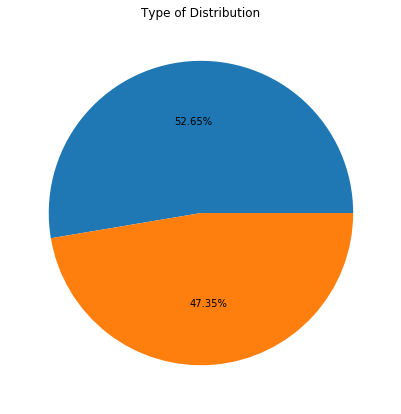

In [50]:
############### Plotting bar graph bar to see the categorial distribution in LosAngeles #################
data_LA = data[(data["region"]=="LosAngeles")& (data.AveragePrice<2)]
#print(data_LA)
print(data_LA.type.value_counts())
plt.figure(figsize=(7,7))
plt.pie(data_LA.type.value_counts(),autopct='%1.2f%%')
plt.title('Type of Distribution')

### Observation :-

- People in LosAngeles prefers conventional avocados over organic.

Now let's find the relation between different features of avocado using Heat Map.

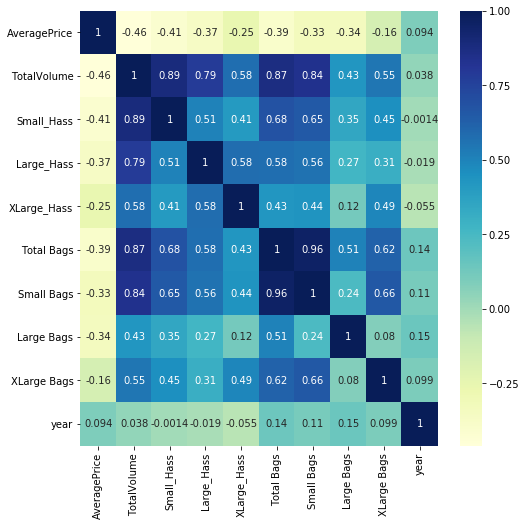

In [51]:
####### TO chek the relation between two features, plotting heatmap ############
heat_map=plt.subplots(figsize=(8,8))
heat_map = sns.heatmap(data.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Observation :-

- Total Bags of Avocados sold were closely related more to small bags, XLarge bags, and Large bags respectively.
- Also, similar observation can be seen with respect to total volume consumed and small bags, XLarge bags and Large bags.
- Hence customers preferences can be concluded as :-  __small bags > XLarge bags > Large bags__

## 4. Preliminary Observation

From above all visualizations below things can be concluded:-

1. The average price of the Avocado was maximum in 2017. The prices were drastically increased from 2016 to 2017. In 2018 average prices of Avocado again dropped.
2. The average price was maximum in 'Hartford-Springfield' throughout the period and minimum in Houston.
3. It is also observed from the grouped bar graph that the average price of organic avocado was more than the conventional type avocado. This is true as the cost required for the manufacture of organic is more than the conventional and hence the average cost price of organic will be more than the conventional.
(Source:- https://www.foxnews.com/food-drink/10-reasons-organic-food-is-so-expensive)
4. From the Average volume ratio graph, it can be inferred that the average volume of avocado consumed by the customers is maximum in Los Angeles. Now in order check, whether the customer prefers organic or conventional avocado, I plotted the pie chart of the distribution of average volume consumed over avocado type for Los Angeles and found that customer prefers conventional avocado more than the organic avocados.
5. Possibly the reason why customer prefers conventional over organic may be the average price difference between these two types.
6. Customers prefer to buy small bags more than Xlarge and large bags.

## 5. Preprocessing of the data for the classification:-

1. Performing sampling to get the 12000 randomly from the whole dataset. In order to perform the classification, I am going to use the same sampled dataset.
2. Once the sampling is done, I will check for the outliers present in the data, in order to remove the same.
3. To check the presence of outliers, plotting boxplots with selected features.

(14000, 4)
Features considered for box-plot :- 
1 . AveragePrice
2 . TotalVolume
3 . Total Bags


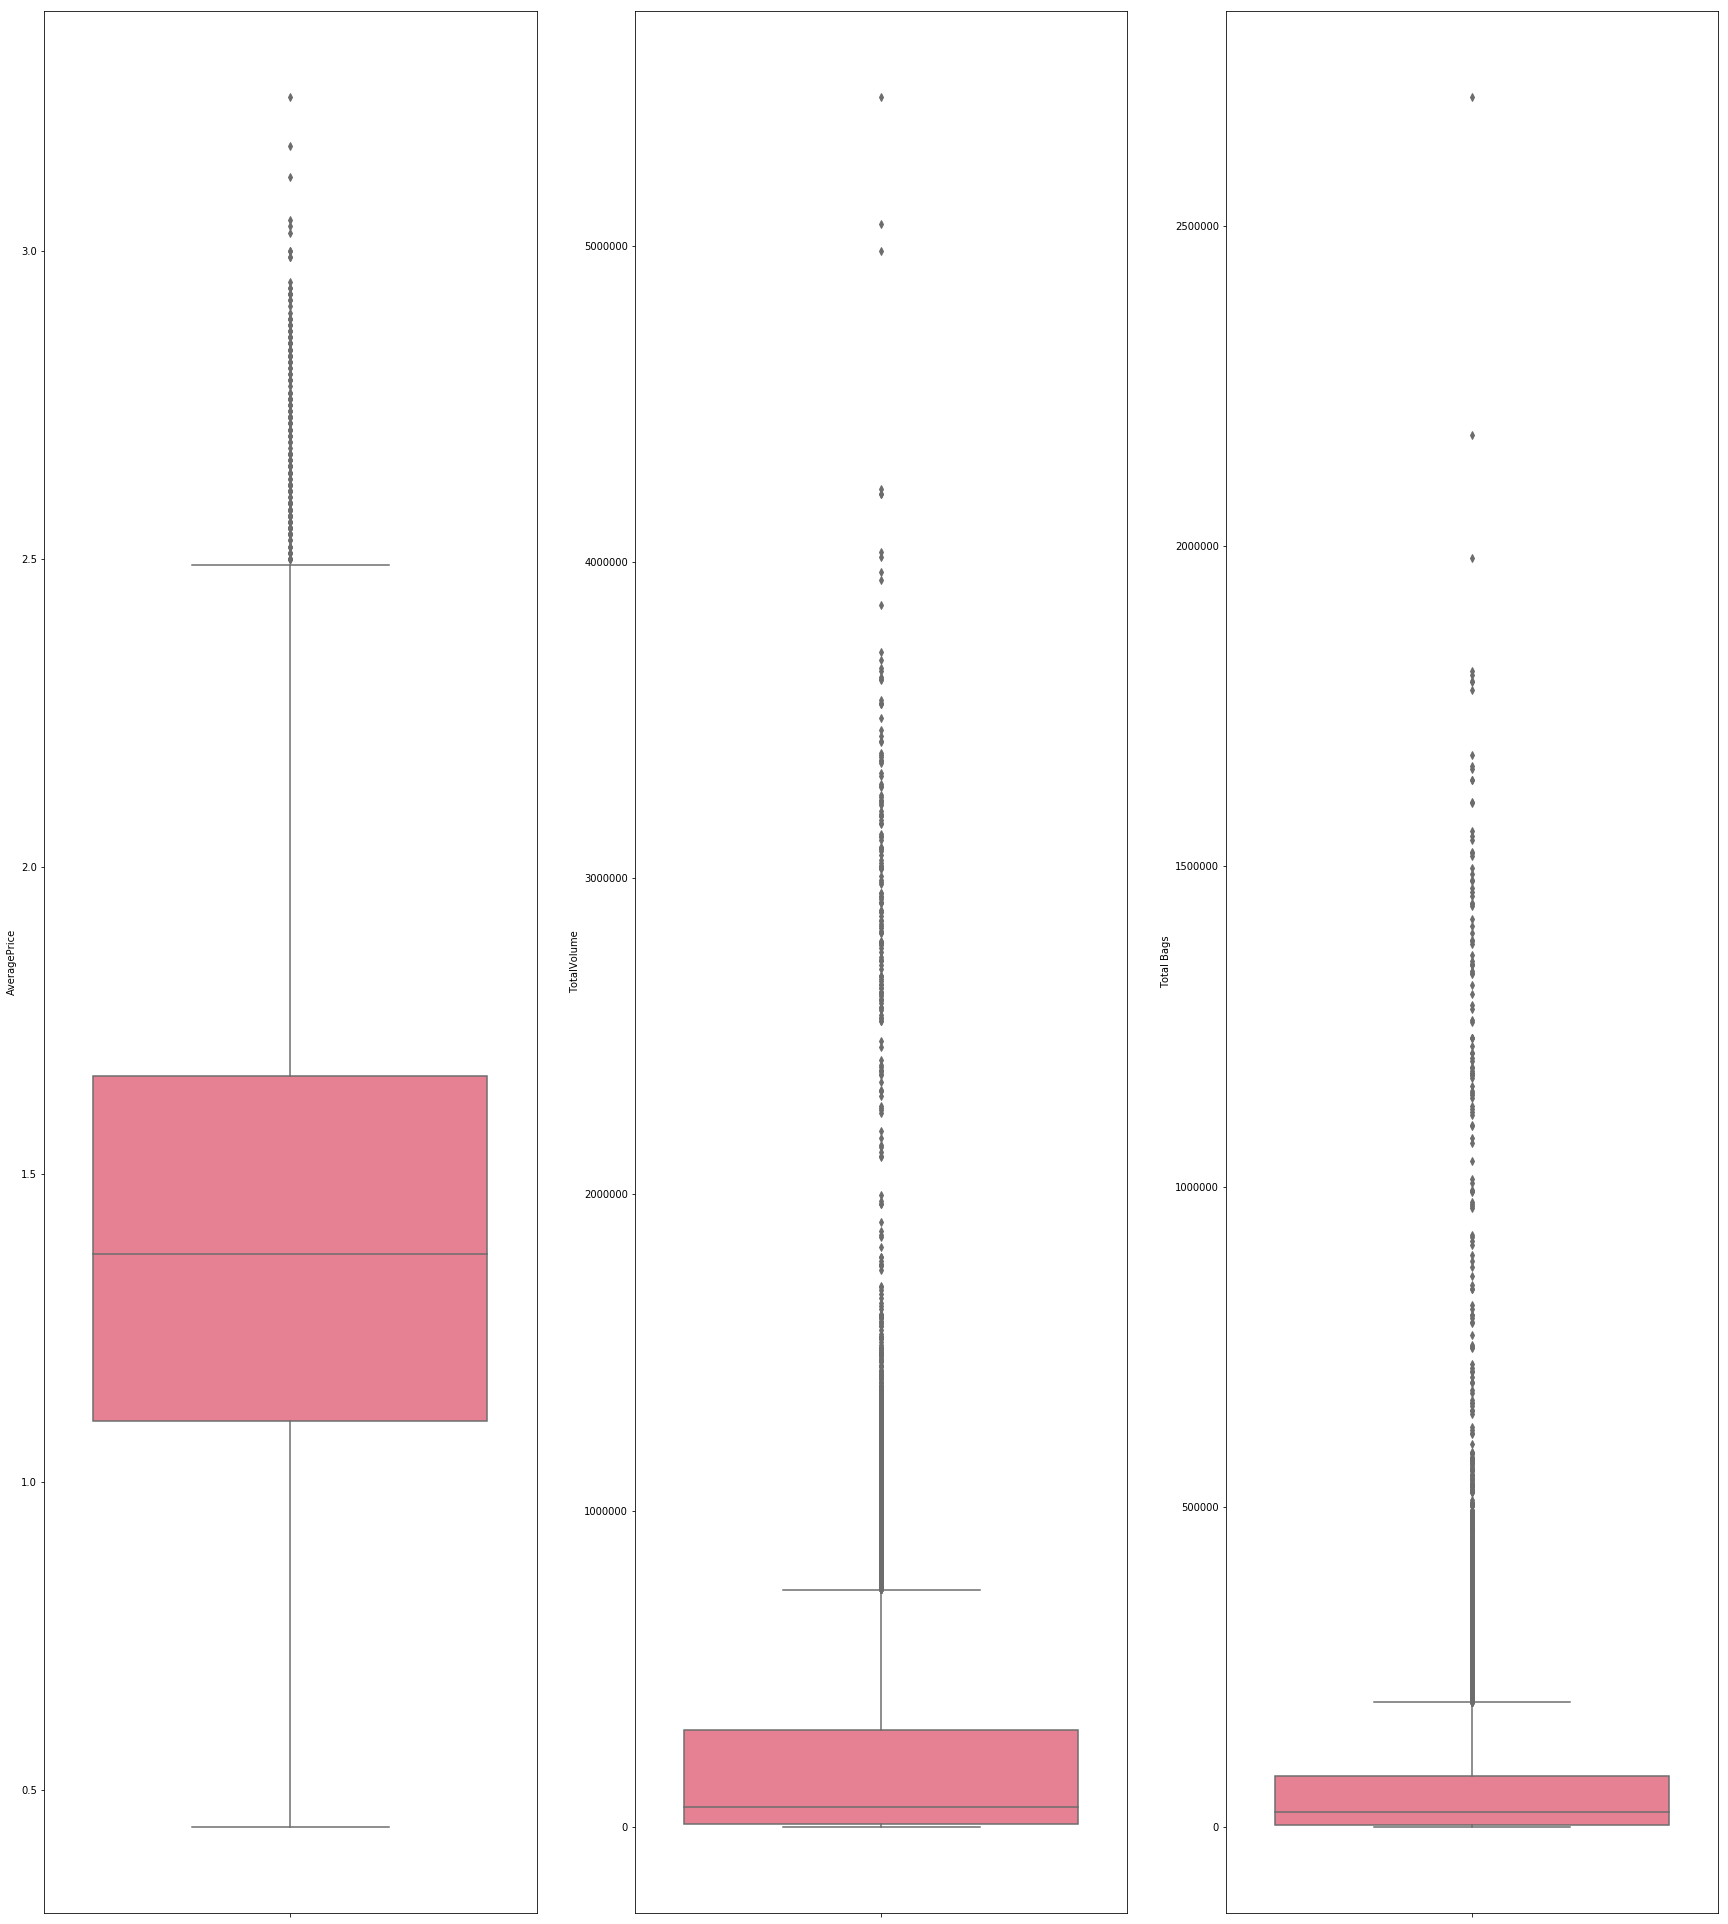

In [52]:
################# Sampling out 12000 data points and plotting box-plots on it ##################
data2 = data[['AveragePrice','TotalVolume','Total Bags','type']].copy()
data2 = data2.sample(14000)
print(data2.shape)
print("Features considered for box-plot :- ")
fig, axes =plt.subplots(1,3,figsize=(30,35))
for i in range (0,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(i+1,".",data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%3],palette = "husl")

In [0]:
######################### Function to remove outliers ##########################
def findOutliers(dataframe,column):
    #column = "total_rooms" 
    #housing[column].plot.box(figsize=(8,8))
    des = dataframe[column].describe()
    print("Description of :-",column,"\n --------------------------------")
    print(des)
    cummulative = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Quantile1 = des[cummulative['25']]
    Quantile3 = des[cummulative['75']]
    IQR = Quantile3-Quantile1
    lowerBound = Quantile1-1.5*IQR
    upperBound = Quantile3+1.5*IQR
    data = dataframe[(dataframe [column] < lowerBound) | (dataframe [column] > upperBound)]
    print("-------------------Removing outliers -----------------")
    #remove the outliers from the dataframe
    outlier = dataframe[~dataframe[column].isin(data[column])]
    return outlier

def norm(df, feature_name):
    #print(feature_name)
    temp_df = data2.copy()
    maxValue = data2[feature_name].max()
    minValue = data2[feature_name].min()
    temp_df[feature_name] = (data2[feature_name] - minValue) / (maxValue - minValue)
    #print(temp_df)
    return temp_df

### Preliminary Observation :- 

- As there are outliers present in the data, we need to remove the same before proceeding with the classification. 
- The above-mentioned method performs the task of removing outliers by calculating quantile boundaries for each column.
- Next step will be to convert the categorical target variable 'type' into -1,1. This is performed so that the same can be used while calculating the weight parameter in case of pocket algorithm of classification.

In [54]:
data2['type'].replace(['conventional','organic'],[0,1],inplace=True)
print(data2.head())

       AveragePrice  TotalVolume  Total Bags  type
7006           1.76    140968.03    59728.72     0
17840          1.46      9885.05     8204.03     1
7771           1.62    391714.30    49297.73     0
10291          1.63     40544.17     7544.36     1
12298          1.59      7485.47     4014.55     1


In [55]:
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"AveragePrice")
print(data2.shape)
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"TotalVolume")
data2 = findOutliers(data2,"TotalVolume")
data2 = findOutliers(data2,"TotalVolume")
print(data2.shape)
############# Removing the ouliers from population ######################
data2 = findOutliers(data2,"Total Bags")
print(data2.shape)

Description of :- AveragePrice 
 --------------------------------
count    14000.000000
mean         1.407622
std          0.411841
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64
-------------------Removing outliers -----------------
(13804, 4)
Description of :- TotalVolume 
 --------------------------------
count    1.380400e+04
mean     2.441497e+05
std      4.278365e+05
min      8.456000e+01
25%      8.382583e+03
50%      6.758516e+04
75%      3.111251e+05
max      5.470227e+06
Name: TotalVolume, dtype: float64
-------------------Removing outliers -----------------
Description of :- TotalVolume 
 --------------------------------
count     12635.000000
mean     146039.567666
std      192083.172502
min          84.560000
25%        7565.805000
50%       35985.800000
75%      235330.685000
max      765147.430000
Name: TotalVolume, dtype: float64
-------------------Removing outliers -------

Features considered for box-plot :- 
1 . AveragePrice
2 . TotalVolume
3 . Total Bags


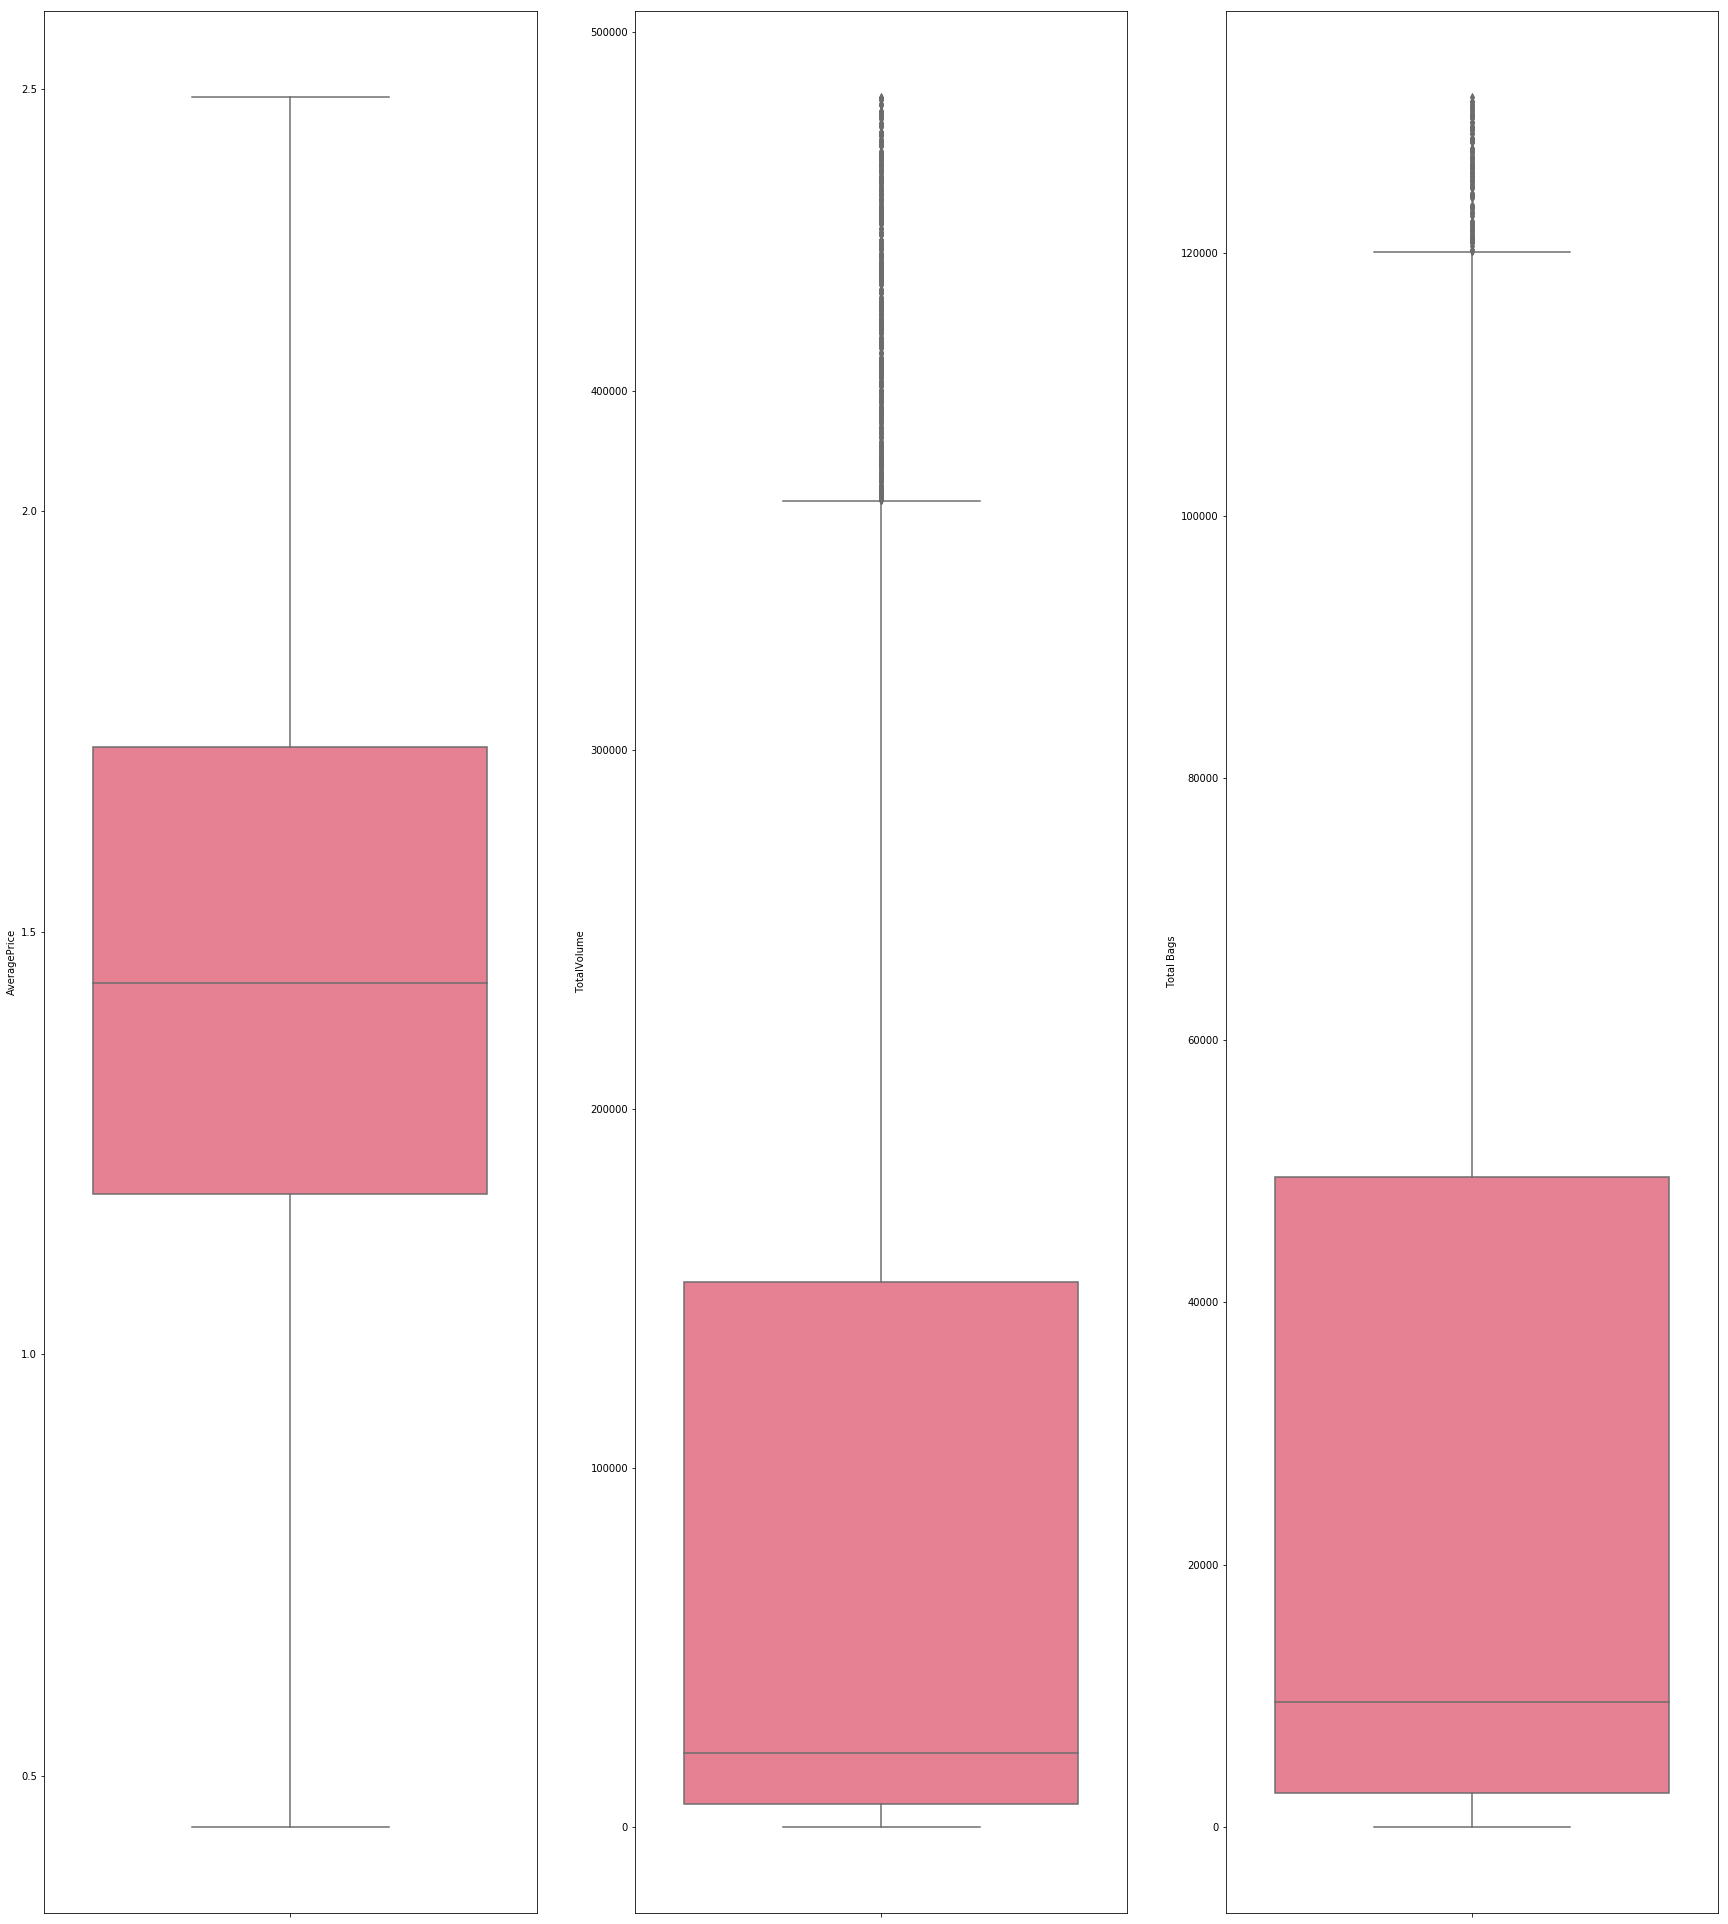

In [56]:
################# Representation of features after removal of the outliers ##################
print("Features considered for box-plot :- ")
fig, axes =plt.subplots(1,3,figsize=(30,35))
for i in range (0,data2.shape[1]-1):
    #fig = plt.figure(figsize = (7, 7))
    print(i+1,".",data2.columns.values[i])
    sns.boxplot(y=str(data2.columns.values[i]),data=data2,ax=axes[i%3],palette = "husl")

### Preliminary Observation :- 

1. We can clearly see the difference in two box plots, the one which we plotted before elimination of the outliers and one after outlier removal.
2. Box plot after removal of all outliers is much better than the previous one and hence our model will be more efficient on this data.
3. To have a more compact data range, we can use the rescaling method of the pre-processing and rescale the data in accordance with min and max value of the respective feature. So the next step will be to rescaling the data and check the effect on boxplots.    
(Source :- https://www.statisticshowto.datasciencecentral.com/normalized/)

In [57]:
print("--------------------- Before Rescaling -----------------------------------")
Temp_df = data2[['AveragePrice','TotalVolume','Total Bags']]

for i in range(len(Temp_df.columns.values)):
    print("Mean of ",Temp_df.columns.values[i],data2[Temp_df.columns.values[i]].mean())

print("---------------------- After Rescaling  -----------------------------------")
#print(data2.head())
for i in range(len(Temp_df.columns.values)):
    data2 = norm(data2,Temp_df.columns.values[i])
    print("Mean of ",Temp_df.columns.values[i],data2[Temp_df.columns.values[i]].mean())


--------------------- Before Rescaling -----------------------------------
Mean of  AveragePrice 1.4671199133808495
Mean of  TotalVolume 90145.04137417683
Mean of  Total Bags 27545.343408824214
---------------------- After Rescaling  -----------------------------------
Mean of  AveragePrice 0.5010341040882227
Mean of  TotalVolume 0.1869341323777111
Mean of  Total Bags 0.20880970709184044


In [58]:
T_Total = data2['type']
X_Total = data2[['AveragePrice','TotalVolume','Total Bags']]
print(X_Total)

       AveragePrice  TotalVolume  Total Bags
7006       0.643902     0.292425    0.452778
17840      0.497561     0.020342    0.062191
7771       0.575610     0.812887    0.373705
10291      0.580488     0.083980    0.057191
12298      0.560976     0.015362    0.030433
18117      0.507317     0.199188    0.400930
7077       0.458537     0.532319    0.548693
13147      0.531707     0.006327    0.005664
13998      0.180488     0.029050    0.073849
4369       0.365854     0.741887    0.341047
16039      0.721951     0.012780    0.032324
12797      0.658537     0.018684    0.065117
12071      0.648780     0.050057    0.095798
6853       0.575610     0.166845    0.330893
10117      0.424390     0.004197    0.006870
3178       0.585366     0.298903    0.343989
15454      0.565854     0.047002    0.133065
13903      0.536585     0.011370    0.016755
15258      0.292683     0.049744    0.143434
15654      0.726829     0.035829    0.105843
15716      0.468293     0.078192    0.206552
14469     

# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)



## Importing Required Libraries

In [0]:
import pandas as pd
import operator
import tensorflow as tf
import keras
from keras import models, layers, losses, optimizers, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.preprocessing import *
from sklearn.metrics import *
import matplotlib.patches as mpatches
from keras.layers import LSTM
from keras.preprocessing import sequence
from keras.utils import to_categorical,np_utils

## Train/Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_Total, T_Total, test_size=0.2, random_state=1)
print('X Train Shape',X_train.shape,'X Test Shape',X_test.shape,'T Train Shape',y_train.shape,'T Test Shape',y_test.shape)

X Train Shape (8866, 3) X Test Shape (2217, 3) T Train Shape (8866,) T Test Shape (2217,)


In [0]:
########## Starting the timer ##########
start = time.time()

## Different neural network structures

In [62]:
neurons = [10,15,18,20,22,45,1]
ls = [4,8,16,32,64,128]
temp ={}

model1=keras.models.Sequential()
model1.add(Dense(input_dim=3, units=3,activation='relu'))
for x in range(len(neurons)):
        model1.add(Dense(units=neurons[x], activation='relu'))
#model1=add_activation(model1,neurons,act,ls)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1_train = model1.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Train on 8866 samples, validate on 2217 samples
Epoch 1/10
8866/8866 [==============================] - 1s 153us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 2/10
8866/8866 [==============================] - 0s 56us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 3/10
8866/8866 [==============================] - 0s 55us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 4/10
8866/8866 [==============================] - 0s 54us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 5/10
8866/8866 [==============================] - 0s 55us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 6/10
8866/8866 [==============================] - 0s 55us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 7/10
8866/8866 [==============================] - 0s 54us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 

In [63]:
eval1 = model1.evaluate(X_test, y_test, batch_size=32)
temp['relu'] = eval1[1]*100
print('Accuracy is :-',eval1[1]*100,'%')

2217/2217 [==============================] - 0s 28us/step
Accuracy is :- 39.10690122861608 %


In [64]:
model2=keras.models.Sequential()
model2.add(Dense(input_dim=3, units=3,activation='tanh'))
for x in range(len(neurons)):
        model2.add(Dense(units=neurons[x], activation='tanh'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2_train = model1.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Train on 8866 samples, validate on 2217 samples
Epoch 1/10
8866/8866 [==============================] - 1s 100us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 2/10
8866/8866 [==============================] - 0s 55us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 3/10
8866/8866 [==============================] - 0s 56us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 4/10
8866/8866 [==============================] - 0s 55us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 5/10
8866/8866 [==============================] - 0s 54us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 6/10
8866/8866 [==============================] - 0s 56us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 7/10
8866/8866 [==============================] - 0s 55us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 

In [65]:
eval2 = model2.evaluate(X_test, y_test, batch_size=32)
temp['tanh'] = eval2[1]*100
print(eval2)

2217/2217 [==============================] - 0s 121us/step
[1.601763209728814, 0.3910690122861608]


In [66]:
model3=keras.models.Sequential()
model3.add(Dense(input_dim=3, units=3,activation='sigmoid'))
for x in range(len(neurons)):
        model3.add(Dense(units=neurons[x], activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3_train = model1.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Train on 8866 samples, validate on 2217 samples
Epoch 1/10
8866/8866 [==============================] - 1s 106us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 2/10
8866/8866 [==============================] - 1s 58us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 3/10
8866/8866 [==============================] - 1s 57us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 4/10
8866/8866 [==============================] - 1s 57us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 5/10
8866/8866 [==============================] - 1s 59us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 6/10
8866/8866 [==============================] - 0s 56us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 7/10
8866/8866 [==============================] - 0s 56us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 

In [67]:
eval3 = model3.evaluate(X_test, y_test, batch_size=32)
temp['sigmoid'] = eval3[1]*100
print(eval3)

2217/2217 [==============================] - 0s 126us/step
[0.7058647040262597, 0.6089309878348229]


In [68]:
model4=keras.models.Sequential()
model4.add(Dense(input_dim=3, units=3,activation='softmax'))
for x in range(len(neurons)):
        model4.add(Dense(units=neurons[x], activation='softmax'))
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4_train = model1.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Train on 8866 samples, validate on 2217 samples
Epoch 1/10
8866/8866 [==============================] - 1s 109us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 2/10
8866/8866 [==============================] - 1s 60us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 3/10
8866/8866 [==============================] - 0s 56us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 4/10
8866/8866 [==============================] - 1s 57us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 5/10
8866/8866 [==============================] - 1s 57us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 6/10
8866/8866 [==============================] - 1s 57us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 7/10
8866/8866 [==============================] - 1s 59us/step - loss: 9.9170 - acc: 0.3847 - val_loss: 9.8148 - val_acc: 0.3911
Epoch 

In [69]:
eval4 = model4.evaluate(X_test, y_test, batch_size=32)
temp['softmax'] = eval4[1]*100
print(eval4)

2217/2217 [==============================] - 0s 135us/step
[6.2345729685066305, 0.6089309878348229]


In [70]:
print('Overall Accuracies :- ')
for k, v in temp.items():
    label = v
    print (k ,"----->",label)

Overall Accuracies :- 
relu -----> 39.10690122861608
tanh -----> 39.10690122861608
sigmoid -----> 60.893098783482294
softmax -----> 60.893098783482294


In [71]:
max_activation = max(temp.items(), key=operator.itemgetter(1))[0]
print(max_activation)

sigmoid


### Now modelling with the best paramter and with different set of neurons

In [72]:
neurons = [5,12,18,100,150,1]
model5=keras.models.Sequential()
model5.add(Dense(input_dim=3, units=3,activation = max_activation))
for x in range(len(neurons)):
        model5.add(Dense(units=neurons[x], activation=max_activation))
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5_train = model5.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])


Train on 8866 samples, validate on 2217 samples
Epoch 1/10
8866/8866 [==============================] - 2s 198us/step - loss: 0.6721 - acc: 0.6153 - val_loss: 0.6692 - val_acc: 0.6089
Epoch 2/10
8866/8866 [==============================] - 1s 84us/step - loss: 0.6702 - acc: 0.6103 - val_loss: 0.6690 - val_acc: 0.6089
Epoch 3/10
8866/8866 [==============================] - 1s 81us/step - loss: 0.6685 - acc: 0.6141 - val_loss: 0.6619 - val_acc: 0.6089
Epoch 4/10
8866/8866 [==============================] - 1s 82us/step - loss: 0.3400 - acc: 0.8387 - val_loss: 0.1292 - val_acc: 0.9504
Epoch 5/10
8866/8866 [==============================] - 1s 83us/step - loss: 0.1370 - acc: 0.9483 - val_loss: 0.1197 - val_acc: 0.9535
Epoch 6/10
8866/8866 [==============================] - 1s 82us/step - loss: 0.1301 - acc: 0.9509 - val_loss: 0.1147 - val_acc: 0.9544
Epoch 7/10
8866/8866 [==============================] - 1s 81us/step - loss: 0.1249 - acc: 0.9535 - val_loss: 0.1210 - val_acc: 0.9585
Epoch 

In [73]:
eval_final = model5.evaluate(X_test, y_test, batch_size=32)
print("Final Accuracy :- ",eval_final[1]*100,"%")

2217/2217 [==============================] - 0s 36us/step
Final Accuracy :-  95.80514208658568 %


# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

### Plots for results:-

In [0]:
def plot_history(history):
    loss = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    accuracy = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    validation_accuracy = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss:
        plt.plot(epochs, history.history[l], 'k', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss:
        plt.plot(epochs, history.history[l], 'c', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in accuracy:
        plt.plot(epochs, history.history[l], 'r', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in validation_accuracy:    
        plt.plot(epochs, history.history[l], 'm', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

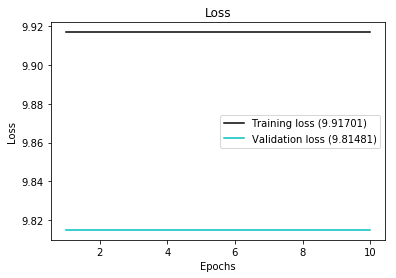

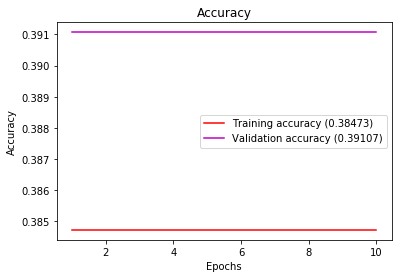

In [75]:
plot_history(model1_train)

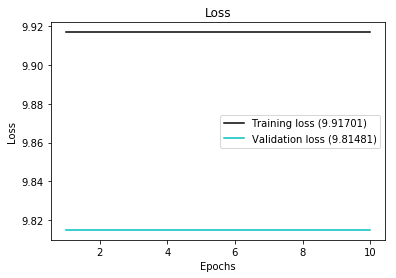

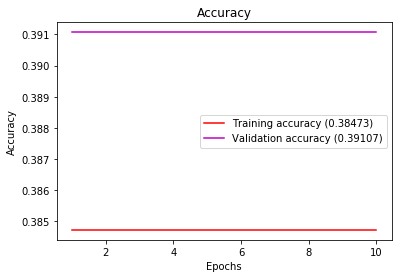

In [76]:
plot_history(model2_train)

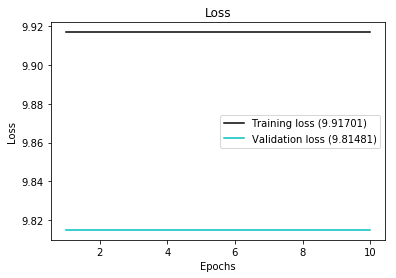

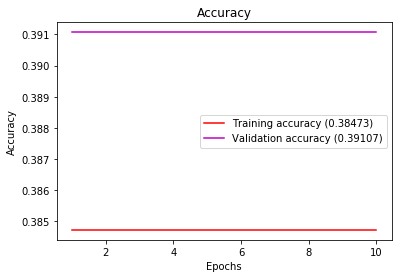

In [77]:
plot_history(model3_train)

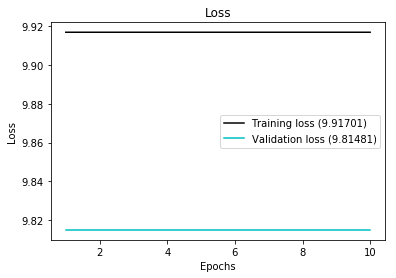

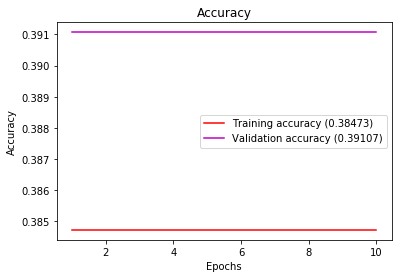

In [78]:
plot_history(model4_train)

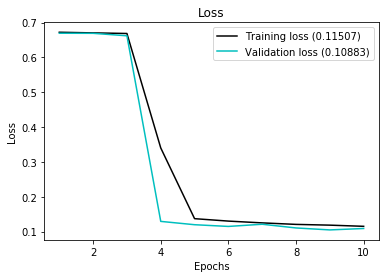

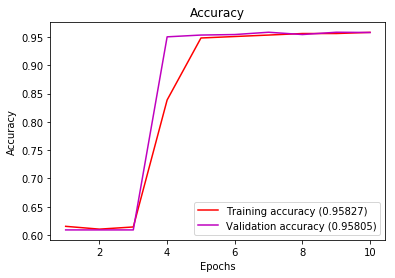

In [79]:
plot_history(model5_train)

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

In [80]:
end = time.time()
print(end - start)

36.4667809009552


# Extra Credit

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart above and apply it to some real data. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
